## Preprocessing

In [27]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [29]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df

KeyError: "['EIN', 'NAME'] not found in axis"

In [4]:
# Determine the number of unique values in each column.
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = list(app_type_count[app_type_count < 600].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

In [31]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count_gt1 = class_count.loc[class_count > 1]
class_count_gt1.head()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [32]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [33]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 9)                 396       
                                                                 
 dense_8 (Dense)             (None, 18)                180       
                                                                 
 dense_9 (Dense)             (None, 1)                 19        
                                                                 
Total params: 595 (2.32 KB)
Trainable params: 595 (2.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [37]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5967 - accuracy: 0.7020
Epoch 2/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5578 - accuracy: 0.7271
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5537 - accuracy: 0.7289
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5521 - accuracy: 0.7292
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5511 - accuracy: 0.7306
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5503 - accuracy: 0.7303
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5493 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5493 - accuracy: 0.7322
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5486 - accuracy: 0.7319
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5480 - accura

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5500 - accuracy: 0.7271 - 883ms/epoch - 3ms/step
Loss: 0.5500220060348511, Accuracy: 0.7271137237548828


<Axes: >

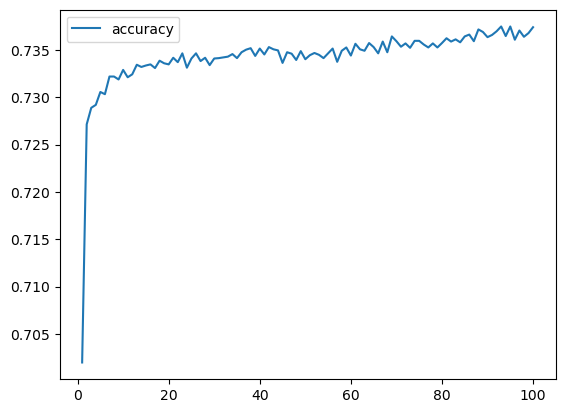

In [39]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [45]:
# Export our model to HDF5 file
filename = '\AlphabetSoupCharity1.h5'
nn.model.save(filename)

AttributeError: 'Sequential' object has no attribute 'model'

In [22]:
# Define the 2nd model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
# X shape/ input feature/columns is 43 * 2 is 86 so chose 80 for the first hidden node
hidden_node1 = 90
hidden_node2 = 30
# Add a third hidden layer
hidden_node3 = 20

nn_model_2 = tf.keras.models.Sequential()

# First hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node1, activation='tanh', input_dim=input_features,))

# Second hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node2, activation='tanh'))

# Third hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node3, activation='tanh'))


# Output layer (output is 1 and sigmoid because it's binary classifier)
nn_model_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 90)                3960      
                                                                 
 dense_4 (Dense)             (None, 30)                2730      
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7331 (28.64 KB)
Trainable params: 7331 (28.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compile the  2nd model
nn_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Train the 2nd model
fit_model_2 = nn_model_2.fit(X_train_scaled, y_train, epochs=50,callbacks=[cp_callback])

NameError: name 'cp_callback' is not defined